# [BAT512] Advanced Data Mining with AI <br/><br/> 2주차 실습자료

## 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

## 데이터 탐색

### 데이터 현황 파악

- 데이터 로드

In [2]:
data = pd.read_csv("./data/titanic/train.csv")

- 데이터 형태 확인

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

- 변수(열) 선택

In [5]:
data["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [6]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

- 데이터 샘플(행) 선택

In [7]:
data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [8]:
data.loc[10]

PassengerId                                 11
Survived                                     1
Pclass                                       3
Name           Sandstrom, Miss. Marguerite Rut
Sex                                     female
Age                                          4
SibSp                                        1
Parch                                        1
Ticket                                 PP 9549
Fare                                      16.7
Cabin                                       G6
Embarked                                     S
Name: 10, dtype: object

- 특정 데이터 샘플의 특정 변수(행, 열) 선택

In [9]:
data.iloc[10]["Survived"]

1

- 조건문을 통한 선택

In [10]:
data[data["Age"]<10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [11]:
data[(data["Age"]<10) & (data["Sex"]=="female")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2,W./C. 6608,34.3750,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S


- 샘플 수 확인

In [12]:
len(data)

891

In [13]:
data.shape[0]

891

In [14]:
print(data.shape[0])

891


In [15]:
display(data.shape[0])

891

- 변수 수 확인

In [16]:
data.shape[1]

12

- 변수별 자료형, 범위 확인

In [17]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 변수별 척도 확인

https://www.kaggle.com/competitions/titanic/data

데이터 종류별 변수 정리

In [19]:
numerical_variables = ["Age", "SibSp", "Parch", "Fare"]
categorical_variables = ["Survived", "Pclass", "Sex", "Embarked"]

- 결측치 확인 및 처리

In [20]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

결측치가 과반이 넘는 변수 "Cabin"은 제거

In [23]:
data.drop(columns=["Cabin"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [24]:
data.drop(columns=["Cabin"], inplace=True)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
data = pd.read_csv("./data/titanic/train.csv")

In [27]:
data = data.drop(columns=["Cabin"])

결측치가 2개밖에 없는 "Embarked"에 대해서는 샘플을 제거

In [28]:
data[data["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [29]:
data.drop(index=data[data["Embarked"].isna()].index, inplace=True)

In [30]:
data.shape

(889, 11)

"Age"의 결측치는 나머지 관측치를 활용하여 대체

1) 전체 관측치의 평균으로 대체

In [31]:
data = pd.read_csv("./data/titanic/train.csv")

In [32]:
data[data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [33]:
index_Age_NaN = data[data["Age"].isna()].index
index_Age_NaN

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [34]:
mean_Age = data["Age"].mean()
mean_Age

29.69911764705882

Age는 정수값을 가져야 하므로 반올림해줌

In [35]:
mean_Age = round(mean_Age,0)
mean_Age

30.0

In [36]:
data["Age"].fillna(mean_Age, inplace=True)

In [37]:
data[data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
data.loc[index_Age_NaN]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,30.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,30.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,30.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,30.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,30.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,30.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,NaN,S


2) 좀 더 현실적인 대체를 위해, "Name" 변수 활용(optional)

In [39]:
data = pd.read_csv("./data/titanic/train.csv")

In [40]:
data.loc[index_Age_NaN]["Name"].tolist() # 전체를 확인하기 위해 .tolist() 수행

['Moran, Mr. James',
 'Williams, Mr. Charles Eugene',
 'Masselmani, Mrs. Fatima',
 'Emir, Mr. Farred Chehab',
 'O\'Dwyer, Miss. Ellen "Nellie"',
 'Todoroff, Mr. Lalio',
 'Spencer, Mrs. William Augustus (Marie Eugenie)',
 'Glynn, Miss. Mary Agatha',
 'Mamee, Mr. Hanna',
 'Kraeff, Mr. Theodor',
 'Rogers, Mr. William John',
 'Lennon, Mr. Denis',
 "O'Driscoll, Miss. Bridget",
 'Samaan, Mr. Youssef',
 'Woolner, Mr. Hugh',
 'Stewart, Mr. Albert A',
 'Moubarek, Master. Gerios',
 'Staneff, Mr. Ivan',
 'Moutal, Mr. Rahamin Haim',
 'McDermott, Miss. Brigdet Delia',
 'Slocovski, Mr. Selman Francis',
 'Shorney, Mr. Charles Joseph',
 'Petroff, Mr. Pastcho ("Pentcho")',
 'Moss, Mr. Albert Johan',
 'Moran, Miss. Bertha',
 'Moore, Mr. Leonard Charles',
 'McMahon, Mr. Martin',
 'Peter, Miss. Anna',
 'Boulos, Mrs. Joseph (Sultana)',
 'Olsen, Mr. Ole Martin',
 'Smiljanic, Mr. Mile',
 'Sage, Master. Thomas Henry',
 'Chibnall, Mrs. (Edith Martha Bowerman)',
 'Baumann, Mr. John D',
 'Lefebre, Master. Henry 

"Mr.", "Mrs.", "Miss."이 대부분이므로, 각각의 호칭별로 해당 호칭이 있는 관측치의 평균을 사용하여 대체
위 세 가지 호칭이 아닌 경우 전체 관측치의 평균으로 대체

In [41]:
data[data["Name"].apply(lambda x: "Mr." in x)][["Name","Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
12,"Saundercock, Mr. William Henry",20.0
...,...,...
881,"Markun, Mr. Johann",33.0
883,"Banfield, Mr. Frederick James",28.0
884,"Sutehall, Mr. Henry Jr",25.0
889,"Behr, Mr. Karl Howell",26.0


In [42]:
sum_Age_Mr = 0
num_Mr = 0
sum_Age_Mrs = 0
num_Mrs = 0
sum_Age_Miss = 0
num_Miss = 0
for idx, row in data.iterrows():
    if row.isna()["Age"] == False:
        if "Mr." in row["Name"]:
            sum_Age_Mr = sum_Age_Mr + row["Age"]
            num_Mr += 1
        elif "Mrs." in row["Name"]:
            sum_Age_Mrs = sum_Age_Mrs + row["Age"]
            num_Mrs += 1
        elif "Miss." in row["Name"]:
            sum_Age_Miss = sum_Age_Miss + row["Age"]
            num_Miss += 1

In [43]:
mean_Age_Mr = sum_Age_Mr / num_Mr
mean_Age_Mr = round(mean_Age_Mr,0)
mean_Age_Mr

32.0

In [44]:
mean_Age_Mrs = sum_Age_Mrs / num_Mrs
mean_Age_Mrs = round(mean_Age_Mrs,0)
mean_Age_Mrs

36.0

In [45]:
mean_Age_Miss = sum_Age_Miss / num_Miss
mean_Age_Miss = round(mean_Age_Miss,0)
mean_Age_Miss

22.0

In [46]:
for idx, row in data.iterrows():
    if row.isna()["Age"] == True:
        if "Mr." in row["Name"]:
            data.loc[idx,"Age"] = mean_Age_Mr
        elif "Mrs." in row["Name"]:
            data.loc[idx,"Age"] = mean_Age_Mrs
        elif "Miss." in row["Name"]:
            data.loc[idx,"Age"] = mean_Age_Miss
        else:
            data.loc[idx,"Age"] = mean_Age

In [47]:
data.loc[index_Age_NaN]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,32.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,36.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,32.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,22.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,32.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,32.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,32.0,0,0,349217,7.8958,NaN,S


결측치 재확인

In [48]:
# 데이터를 새로 로드했으므로, "Cabin", "Embarked"에 대한 결측치 제거 재수행
data.drop(columns=["Cabin"], inplace=True)
data.drop(index=data[data["Embarked"].isna()].index, inplace=True)

In [49]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 변수별 특징 탐색

#### 수치형 변수의 특징 탐색

In [50]:
data[numerical_variables]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,22.0,1,2,23.4500
889,26.0,0,0,30.0000


- 기술 통계량 확인

중심성(샘플 수, 평균값, 중간값) 및 분산(범위, 사분위수, 분산)

In [51]:
data[numerical_variables].describe()

,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.771845,0.524184,0.382452,32.096681
std,13.116723,1.103705,0.806761,49.697504
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,30.000000,0.000000,0.000000,14.454200
75%,36.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


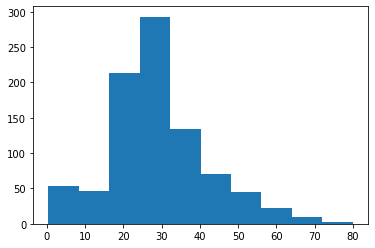

In [52]:
plt.hist(data[numerical_variables]["Age"].values)
plt.show()

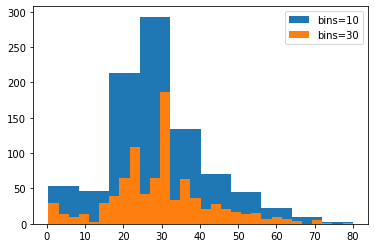

In [53]:
plt.hist(data[numerical_variables]["Age"].values, label="bins=10")
plt.hist(data[numerical_variables]["Age"].values, bins=30, label="bins=30")
plt.legend()
plt.show()

중심성 - 최빈값

In [54]:
data[numerical_variables].mode()

,Age,SibSp,Parch,Fare
0,32.0,0,0,8.05


분포 - 왜도

In [55]:
data[numerical_variables].skew()

Age      0.384966
SibSp    3.691058
Parch    2.745160
Fare     4.801440
dtype: float64

분포 - 첨도

In [56]:
data[numerical_variables].kurtosis()

Age       0.793039
SibSp    17.838972
Parch     9.750592
Fare     33.508477
dtype: float64

#### 범주형 변수의 특징 탐색

- 범주별 샘플 수

In [57]:
data[categorical_variables]

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S
...,...,...,...,...
886,0,2,male,S
887,1,1,female,S
888,0,3,female,S
889,1,1,male,C


In [58]:
data["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [59]:
data["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [60]:
data["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [61]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 변수 간 관계 탐색

#### 수치형-수치형 변수 간 관계 탐색

- Age와 Fare의 상관관계

In [62]:
data["Age"].corr(data["Fare"])

0.08968372622854369

산점도 시각화

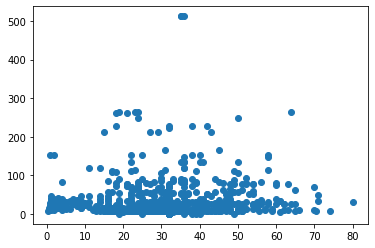

In [63]:
plt.scatter(data["Age"], data["Fare"])
plt.show()

- 전체 수치형 변수 간 상관관계

In [64]:
data[numerical_variables].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.246450,-0.186499,0.089684
SibSp,-0.246450,1.000000,0.414542,0.160887
Parch,-0.186499,0.414542,1.000000,0.217532
Fare,0.089684,0.160887,0.217532,1.000000


히트맵 시각화

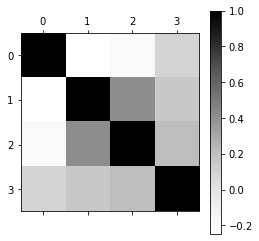

In [65]:
plt.matshow(data[numerical_variables].corr(), cmap=plt.get_cmap("Greys"))
plt.colorbar()
plt.show()

#### 범주형-수치형 변수 간 관계 탐색

- Survived 여부에 따른 Age 분포

In [66]:
data.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.694900,12.548021,1.00,22.0,32.0,35.0,74.0
1,340.0,28.281382,13.875955,0.42,21.0,28.5,36.0,80.0


박스 플롯 시각화

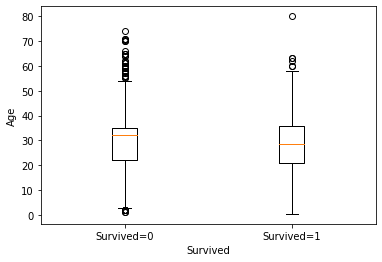

In [67]:
plt.boxplot([data[data["Survived"]==0]["Age"], data[data["Survived"]==1]["Age"]])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.xticks(ticks=[1,2], labels=["Survived=0", "Survived=1"])
plt.show()

- Survived 여부에 따른 Fare 분포

In [68]:
data.groupby("Survived")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.85420,10.5,26.0000,263.0000
1,340.0,48.209498,66.748773,0.0,12.44375,26.0,56.9469,512.3292


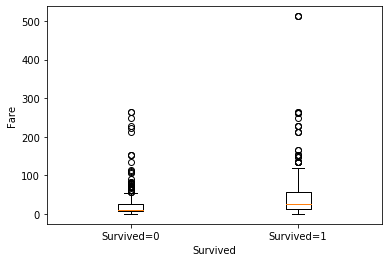

In [69]:
plt.boxplot([data[data["Survived"]==0]["Fare"], data[data["Survived"]==1]["Fare"]])
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks(ticks=[1,2], labels=["Survived=0", "Survived=1"])
plt.show()

#### 범주형-범주형 변수 간 관계 탐색

- Survived 여부와 Pclass의 교차 테이블

In [70]:
pd.crosstab(data["Survived"], data["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


모자이크 플롯 시각화

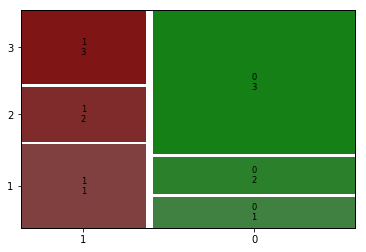

In [71]:
mosaic(data.sort_values("Pclass"), ["Survived", "Pclass"], gap=0.02)
plt.show()

막대 그래프 시각화

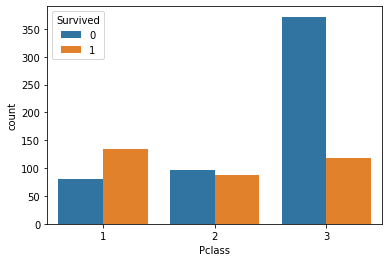

In [72]:
sns.countplot(data=data, x="Pclass", hue="Survived")
plt.show()

## 데이터 정제

### 변수 변환

- 수치형 변수 변환

In [73]:
data[numerical_variables]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,22.0,1,2,23.4500
889,26.0,0,0,30.0000


정규화

In [74]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit_transform(data[numerical_variables].values)

array([[0.27117366, 0.125     , 0.        , 0.01415106],
       [0.4722292 , 0.125     , 0.        , 0.13913574],
       [0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [0.27117366, 0.125     , 0.33333333, 0.04577135],
       [0.32143755, 0.        , 0.        , 0.0585561 ],
       [0.39683338, 0.        , 0.        , 0.01512699]])

표준화

In [75]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(data[numerical_variables].values)

array([[-0.59284774,  0.43135024, -0.47432585, -0.50023975],
       [ 0.62765577,  0.43135024, -0.47432585,  0.78894661],
       [-0.28772186, -0.47519908, -0.47432585, -0.48664993],
       ...,
       [-0.59284774,  0.43135024,  2.00611934, -0.17408416],
       [-0.28772186, -0.47519908, -0.47432585, -0.0422126 ],
       [ 0.16996696, -0.47519908, -0.47432585, -0.49017322]])

- 범주형 변수 변환

In [76]:
data[categorical_variables]

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S
...,...,...,...,...
886,0,2,male,S
887,1,1,female,S
888,0,3,female,S
889,1,1,male,C


레이블 인코딩

In [77]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(data["Sex"])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [78]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(data["Embarked"])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

원-핫 인코딩

In [79]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(data[["Sex"]])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [80]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(data[["Embarked"]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 차원 축소

### 차원 선택

- 필터 방식

In [81]:
data[numerical_variables].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.246450,-0.186499,0.089684
SibSp,-0.246450,1.000000,0.414542,0.160887
Parch,-0.186499,0.414542,1.000000,0.217532
Fare,0.089684,0.160887,0.217532,1.000000


다른 변수와의 상관관계가 높은 편인 "Parch" 변수를 분석에서 제외함

In [82]:
data.drop(columns=["Parch"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C


### 차원 추출 - 주성분 분석

주성분 분석 실시

In [83]:
pca = PCA(n_components=4)
pd.DataFrame(pca.fit_transform(data[numerical_variables]), index=data.index, columns=["1st_component", "2nd_component", "3rd_component", "4th_component"])

,1st_component,2nd_component,3rd_component,4th_component
0,-25.035482,-7.144443,0.209367,-0.519181
1,39.382887,7.226600,0.278571,-0.594312
2,-24.262609,-3.141734,-0.602954,-0.098758
3,21.129457,4.688160,0.298436,-0.569052
4,-23.908975,5.849220,-0.373197,-0.076095
...,...,...,...,...
886,-19.163902,-2.270663,-0.604333,-0.105395
887,-2.372870,-10.695120,-0.899533,-0.156491
888,-8.833895,-7.579801,0.945765,1.274352
889,-2.195010,-3.699698,-0.720316,-0.138688


주성분별 분산 확인

In [84]:
print("주성분으로 설명되는 원본 데이터의 분산(고유값):", pca.explained_variance_ratio_)
print("누적 분산:", pca.explained_variance_ratio_.cumsum())

주성분으로 설명되는 원본 데이터의 분산(고유값): [9.34801293e-01 6.45577904e-02 4.66391401e-04 1.74525553e-04]
누적 분산: [0.93480129 0.99935908 0.99982547 1.        ]
